In [17]:
from tempfile import NamedTemporaryFile
import time
import subprocess
import matplotlib.pyplot as plt


def benchmark(code):
    st = time.time()
    with NamedTemporaryFile("w") as f:
        f.write(code)
        f.flush()
        subprocess.check_call(f"du -h {f.name}", shell=True)
        subprocess.check_call(f"python3 {f.name}", shell=True)
    en = time.time()
    return en - st


def make_code(size_bytes):
    code = ""
    f = "def a_{i}():\n    print('Hello, world!')\n\n"
    # f = "a_{i} = 0\n"
    f_len = len(f)
    for i in range(size_bytes // f_len):
        code += f.format(i=i)
    return code


X = []
Y = []
size = 100
while size < 1e9:
    t = benchmark(make_code(size))
    X.append(size)
    Y.append(t)
    size *= 2

4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp8gdbsudo
4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp6o9iv4n6
4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpvolaj9lf
4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpc_r8b1ma
4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp2j0a9bvr
4.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpc0k_4adi
8.0K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp06h7d8zf
 16K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpcb1a0rlj
 28K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpyti1u_iw
 52K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpj8u290e2
104K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpd8p3gkws
204K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpklvv19sg
412K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp1pbu068b
832K	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmp8k_3ay1_
1.6M	/var/folders/06/ml00b2y11p5bppg1qknx06qr0000gn/T/tmpjvyjaiyd
3.3M	/var/

KeyboardInterrupt: 

Text(0, 0.5, 'time (seconds)')

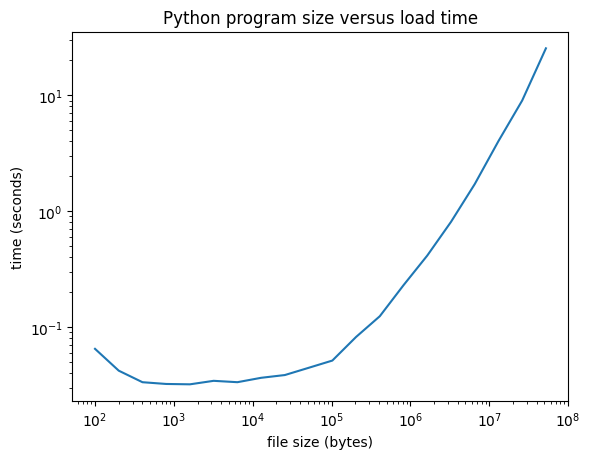

In [18]:
plt.plot(X, Y)
plt.xscale("log")
plt.yscale("log")
plt.title("Python program size versus load time")
plt.xlabel("file size (bytes)")
plt.ylabel("time (seconds)")